# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
df = pd.read_csv('data/WHR2018Chapter2OnlineData.csv')

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.shape

(1562, 19)

In [5]:
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [6]:
df.columns.values

array(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype=object)

In [7]:
nan_count = df.isnull().values.any()
nan_count


True

In [8]:
missing_values = df.isnull().sum()
missing_values

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [9]:
df_summ = df.describe(include = 'all')
df_summ

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
unique,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,NaN,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,NaN,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,NaN,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,NaN,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,NaN,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579


In [10]:
df = df.drop(['country', 'year'], axis=1)

In [11]:
df.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
Life Ladder,1.000000,0.779476,0.700299,0.729852,0.526058,0.204910,-0.425013,0.554462,-0.267492,-0.085543,0.607034,0.706673,-0.154257,-0.756076,-0.097255,-0.172745,-0.294080
Log GDP per capita,0.779476,1.000000,0.658591,0.841612,0.362998,-0.000334,-0.350142,0.311868,-0.120597,-0.162000,0.630107,0.770370,-0.086494,-0.566376,-0.342142,-0.314639,-0.355850
Social support,0.700299,0.658591,1.000000,0.586759,0.418213,0.077543,-0.217857,0.459656,-0.352552,-0.160353,0.536387,0.545010,-0.174091,-0.594465,-0.148387,-0.128284,-0.314072
Healthy life expectancy at birth,0.729852,0.841612,0.586759,1.000000,0.340026,0.047079,-0.311037,0.297759,-0.105255,-0.188827,0.597106,0.721081,-0.065870,-0.526026,-0.306798,-0.364279,-0.422890
Freedom to make life choices,0.526058,0.362998,0.418213,0.340026,1.000000,0.357158,-0.496932,0.615916,-0.284391,0.408096,0.445323,0.486678,-0.081104,-0.369111,0.044033,0.057697,0.108313
Generosity,0.204910,-0.000334,0.077543,0.047079,0.357158,1.000000,-0.305019,0.380896,-0.117508,0.275648,0.118966,0.203871,-0.182119,-0.193145,-0.016602,-0.043810,0.194036
Perceptions of corruption,-0.425013,-0.350142,-0.217857,-0.311037,-0.496932,-0.305019,1.000000,-0.302946,0.267359,-0.436614,-0.322063,-0.514183,0.301730,0.378509,0.158565,0.170775,-0.043064
Positive affect,0.554462,0.311868,0.459656,0.297759,0.615916,0.380896,-0.302946,1.000000,-0.384112,0.144219,0.369666,0.365544,-0.069609,-0.410061,0.371113,0.298045,0.121792
Negative affect,-0.267492,-0.120597,-0.352552,-0.105255,-0.284391,-0.117508,0.267359,-0.384112,1.000000,-0.159316,-0.198636,-0.211019,0.510342,0.520042,0.171791,0.074559,0.148413
Confidence in national government,-0.085543,-0.162000,-0.160353,-0.188827,0.408096,0.275648,-0.436614,0.144219,-0.159316,1.000000,-0.145397,-0.046219,-0.178880,-0.017413,0.016160,0.051886,0.189267


In [12]:
df.rename(columns = {'Life Ladder':'label', 'Log GDP per capita':'GDP'}, inplace = True)

In [13]:
df.head()

,label,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [14]:
df.corr()

,label,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
label,1.000000,0.779476,0.700299,0.729852,0.526058,0.204910,-0.425013,0.554462,-0.267492,-0.085543,0.607034,0.706673,-0.154257,-0.756076,-0.097255,-0.172745,-0.294080
GDP,0.779476,1.000000,0.658591,0.841612,0.362998,-0.000334,-0.350142,0.311868,-0.120597,-0.162000,0.630107,0.770370,-0.086494,-0.566376,-0.342142,-0.314639,-0.355850
Social support,0.700299,0.658591,1.000000,0.586759,0.418213,0.077543,-0.217857,0.459656,-0.352552,-0.160353,0.536387,0.545010,-0.174091,-0.594465,-0.148387,-0.128284,-0.314072
Healthy life expectancy at birth,0.729852,0.841612,0.586759,1.000000,0.340026,0.047079,-0.311037,0.297759,-0.105255,-0.188827,0.597106,0.721081,-0.065870,-0.526026,-0.306798,-0.364279,-0.422890
Freedom to make life choices,0.526058,0.362998,0.418213,0.340026,1.000000,0.357158,-0.496932,0.615916,-0.284391,0.408096,0.445323,0.486678,-0.081104,-0.369111,0.044033,0.057697,0.108313
Generosity,0.204910,-0.000334,0.077543,0.047079,0.357158,1.000000,-0.305019,0.380896,-0.117508,0.275648,0.118966,0.203871,-0.182119,-0.193145,-0.016602,-0.043810,0.194036
Perceptions of corruption,-0.425013,-0.350142,-0.217857,-0.311037,-0.496932,-0.305019,1.000000,-0.302946,0.267359,-0.436614,-0.322063,-0.514183,0.301730,0.378509,0.158565,0.170775,-0.043064
Positive affect,0.554462,0.311868,0.459656,0.297759,0.615916,0.380896,-0.302946,1.000000,-0.384112,0.144219,0.369666,0.365544,-0.069609,-0.410061,0.371113,0.298045,0.121792
Negative affect,-0.267492,-0.120597,-0.352552,-0.105255,-0.284391,-0.117508,0.267359,-0.384112,1.000000,-0.159316,-0.198636,-0.211019,0.510342,0.520042,0.171791,0.074559,0.148413
Confidence in national government,-0.085543,-0.162000,-0.160353,-0.188827,0.408096,0.275648,-0.436614,0.144219,-0.159316,1.000000,-0.145397,-0.046219,-0.178880,-0.017413,0.016160,0.051886,0.189267


In [15]:
exclude = ['label']

corrs = df.corr()['label'].drop(exclude, axis=0)
corrs = corrs.sort_values(ascending=False)
corrs

GDP                                                         0.779476
Healthy life expectancy at birth                            0.729852
Delivery Quality                                            0.706673
Social support                                              0.700299
Democratic Quality                                          0.607034
Positive affect                                             0.554462
Freedom to make life choices                                0.526058
Generosity                                                  0.204910
Confidence in national government                          -0.085543
GINI index (World Bank estimate)                           -0.097255
Standard deviation of ladder by country-year               -0.154257
GINI index (World Bank estimate), average 2000-15          -0.172745
Negative affect                                            -0.267492
gini of household income reported in Gallup, by wp5-year   -0.294080
Perceptions of corruption         

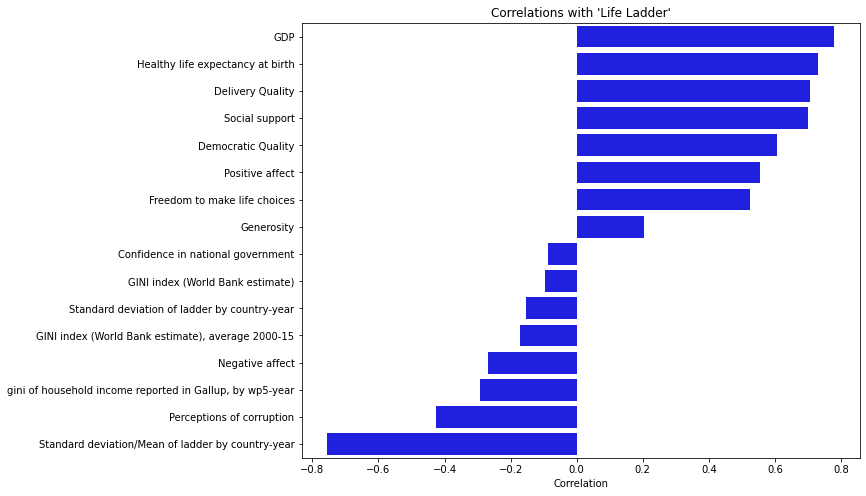

In [16]:
plt.figure(figsize=(10, 8))
sns.barplot(x=corrs.values, y=corrs.index, color='b')
plt.title("Correlations with 'Life Ladder'")
plt.xlabel('Correlation')
plt.show()

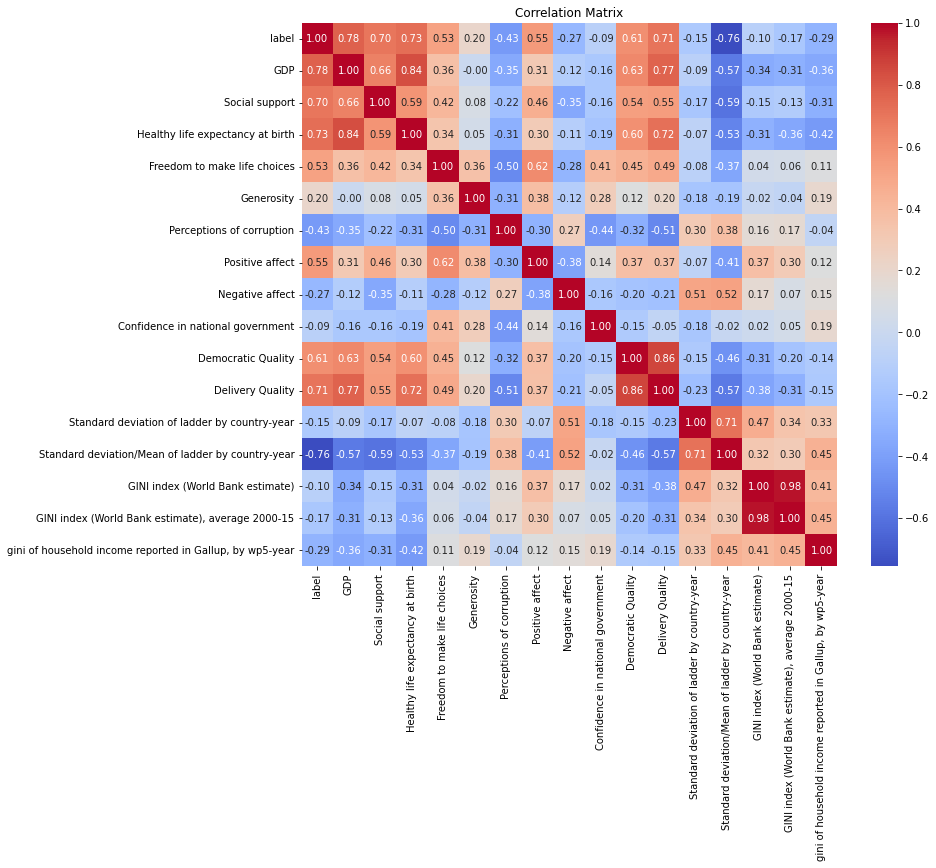

In [17]:
corr = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title("Correlation Matrix")

plt.show()


In [18]:
missing_values_sorted = missing_values.sort_values(ascending=False)
missing_values_sorted



GINI index (World Bank estimate)                            979
gini of household income reported in Gallup, by wp5-year    357
GINI index (World Bank estimate), average 2000-15           176
Delivery Quality                                            171
Democratic Quality                                          171
Confidence in national government                           161
Perceptions of corruption                                    90
Generosity                                                   80
Freedom to make life choices                                 29
Log GDP per capita                                           27
Positive affect                                              18
Social support                                               13
Negative affect                                              12
Healthy life expectancy at birth                              9
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

Wanna drop this column due to a lot of missing values : GINI index (979), gini of household income reported in Gallup, by wp5-year (357), GINI index (World Bank estimate), average 2000-15 (176), Delivery Quality (171),                             Democratic Quality (171, Confidence in national government (161)

In [19]:
#dropping because of missing values
df = df.drop(columns=['GINI index (World Bank estimate)', 'gini of household income reported in Gallup, by wp5-year', 'GINI index (World Bank estimate), average 2000-15', 'Delivery Quality', 'Democratic Quality', 'Confidence in national government' ], axis=1)


In [20]:
df.head()

#most correlated features
#GDP                                                         0.779476 +
#Healthy life expectancy at birth                            0.729852 +
#Delivery Quality                                            0.706673 -
#Social support                                              0.700299 +
#Democratic Quality                                          0.607034 - 
#Positive affect                                             0.554462 +
#Freedom to make life choices                                0.526058 +
#Generosity                                                  0.204910 +
#Confidence in national government                          -0.085543 -


#feautures chosen:
# GDP
# Healthy life expectancy at birth  
# Social support  
# Positive affect                                             
# Freedom to make life choices 
# Generosity



,label,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,1.774662,0.476600
1,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,1.722688,0.391362
2,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,1.878622,0.394803
3,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,1.785360,0.465942
4,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,1.798283,0.475367


In [21]:
df = df.drop(columns=['Perceptions of corruption', 'Negative affect', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year' ], axis=1)

In [22]:
nan_count = df.isna().sum()
nan_count


label                                0
GDP                                 27
Social support                      13
Healthy life expectancy at birth     9
Freedom to make life choices        29
Generosity                          80
Positive affect                     18
dtype: int64

In [23]:
df.dtypes

label                               float64
GDP                                 float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Positive affect                     float64
dtype: object

In [24]:
to_impute = df.columns[1:]
to_impute.tolist()

['GDP',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Positive affect']

In [25]:
impute_median = df[to_impute].median()
impute_median

##WHEN IMPROVING MODEL CHANGE MEdian for mean in healthy life expectancy

GDP                                  9.398610
Social support                       0.833047
Healthy life expectancy at birth    63.803192
Freedom to make life choices         0.748014
Generosity                          -0.022638
Positive affect                      0.717398
dtype: float64

In [26]:
df[to_impute] = df[to_impute].fillna(impute_median)

In [27]:
df.isna().sum()

label                               0
GDP                                 0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Positive affect                     0
dtype: int64

In [28]:
df.describe()

,label,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Positive affect
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,5.433676,9.223895,0.810855,62.258837,0.729328,-0.001084,0.709066
std,1.121017,1.173979,0.118890,7.938561,0.144074,0.160017,0.107025
min,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.362498
25%,4.606351,8.330659,0.749794,57.344959,0.635676,-0.108292,0.622581
50%,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.717398
75%,6.271025,10.167549,0.904097,68.064693,0.841122,0.086098,0.799524
max,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.943621


In [29]:
#HANDLING OUTLIERS
columns_to_check = to_impute.tolist()
columns_to_check

['GDP',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Positive affect']

In [30]:
#Q1, Q3, and IQR for each column in the df
Q1_df = df[columns_to_check].quantile(0.25)
Q3_df = df[columns_to_check].quantile(0.75)
IQR_df = Q3_df - Q1_df

# DEFINE OUTLIERS
outliers_df = (df[columns_to_check] < (Q1_df - 1.5 * IQR_df)) | (df[columns_to_check] > (Q3_df + 1.5 * IQR_df))

# DISPLAY QUANTITY OF OUTLIERS
outliers_df_sorted = outliers_df.sum().sort_values(ascending=False)
outliers_df_sorted

Social support                      37
Generosity                          31
Healthy life expectancy at birth     9
Freedom to make life choices         8
Positive affect                      0
GDP                                  0
dtype: int64

In [31]:
columns_with_outliers = outliers_df_sorted.index.tolist()[:4]
columns_with_outliers

['Social support',
 'Generosity',
 'Healthy life expectancy at birth',
 'Freedom to make life choices']

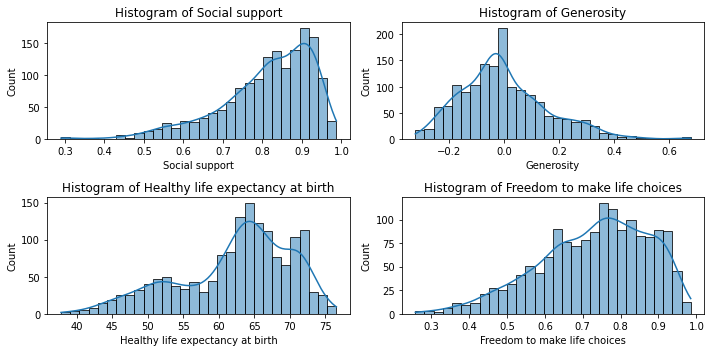

In [32]:
plt.figure(figsize=(10, 5))

# Create histograms for the columns with outliers
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


In [33]:
winsorized_data = df.copy()
for column in columns_to_check:
    winsorized_data[column] = winsorize(winsorized_data[column], limits=[0.05, 0.05])
    
##limits 0.05 were chosen as less agressive than 0.01. However, can be changed in the future when improving the model

transformed_data = winsorized_data.copy()
for column in columns_to_check:
    transformed_data[column] = np.log1p(transformed_data[column])

transformed_data.head()

#transformation needed for linear regression to make possible non-linear relationships linearized. 

,label,GDP,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Positive affect
0,3.723590,2.107062,0.449078,3.916208,0.541227,0.167055,0.423260
1,4.401778,2.120318,0.449078,3.924434,0.518137,0.185329,0.459906
2,4.758381,2.126639,0.449078,3.932001,0.470083,0.128947,0.481355
3,3.831719,2.130018,0.449078,3.939002,0.402729,0.161548,0.477095
4,3.782938,2.142079,0.449078,3.945637,0.425879,0.220868,0.536718


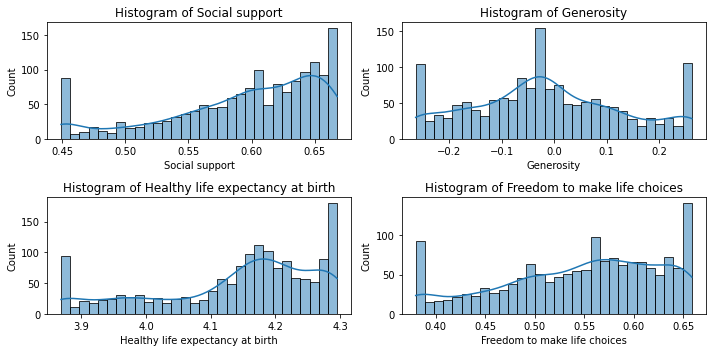

In [34]:
plt.figure(figsize=(10, 5))

# Create histograms for the transformed dataset
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 2, i)
    sns.histplot(transformed_data[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [35]:
new_df = transformed_data.copy()
new_df.shape

(1562, 7)

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [36]:
X = new_df[['GDP', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Positive affect']]
y = new_df['label']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [80]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the train data 
train_prediction = model.predict(X_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
lr_r2 = r2_score(y_train, train_prediction)

In [81]:
# The mean squared error
print('\nModel Performance on training data\n\nRMSE =   %.2f'
      % lr_rmse)
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % lr_r2)


# The mean squared error
print('\nModel Performance on testing data\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance on training data

RMSE =   0.55
 R^2 =   0.75

Model Performance on testing data

RMSE =   0.55
 R^2 =   0.77


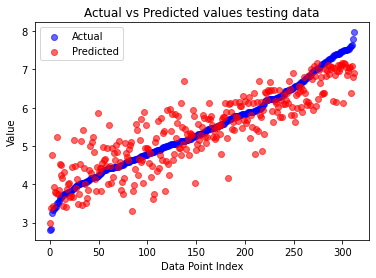

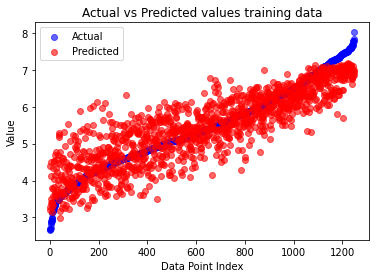

In [40]:
plt.figure(figsize=(6, 4))

# Convert to NumPy arrays for consistent indexing
y_test_array = np.array(y_test)
prediction_array = np.array(prediction)

# Sort the data for better visualization
sorted_indices = np.argsort(y_test_array)
sorted_y_test = y_test_array[sorted_indices]
sorted_prediction = prediction_array[sorted_indices]

plt.scatter(range(len(y_test)), sorted_y_test, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), sorted_prediction, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values testing data')
plt.legend()
plt.show()


plt.figure(figsize=(6, 4))


y_train_array = np.array(y_train)
train_prediction_array = np.array(train_prediction)

# Sort the data for better visualization
sorted_indices = np.argsort(y_train_array)
sorted_y_train = y_train_array[sorted_indices]
sorted_train_prediction = train_prediction_array[sorted_indices]

plt.scatter(range(len(y_train)), sorted_y_train, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_train)), sorted_train_prediction, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values training data')
plt.legend()
plt.show()



In [82]:
#DecisionTree with default parametrs


tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

# Make predictions
tree_train_predictions = tree_model.predict(X_train)

tree_predictions = tree_model.predict(X_test)

dt_rmse_default = np.sqrt(mean_squared_error(y_test, tree_predictions))
dt_r2_default = r2_score(y_test, tree_predictions)

# Evaluate the model on training data
print('\nModel Performance\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_train, tree_train_predictions)))
print(' R^2 =   %.2f' % r2_score(y_train, tree_train_predictions))

#evaluating on testing data
print('\nModel Performance\n\nRMSE =   %.2f' % dt_rmse_default)
print(' R^2 =   %.2f' % dt_r2_default)
      

#after changing missing values for median instead of mean r^2 went up .01


Model Performance

RMSE =   0.00
 R^2 =   1.00

Model Performance

RMSE =   0.55
 R^2 =   0.77


Super overfitting tree - not good

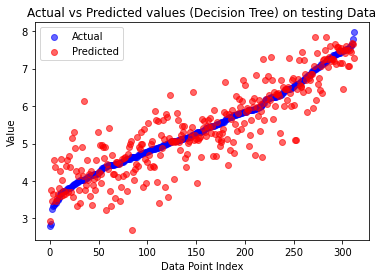

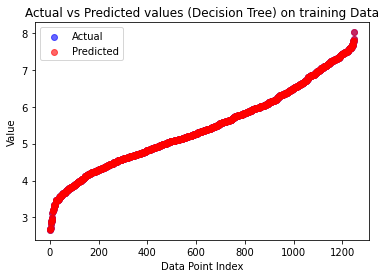

In [44]:
# Convert to NumPy arrays for consistent indexing (testing data)
y_test_array = np.array(y_test)
tree_predictions_array = np.array(tree_predictions)

# Sort the data for better visualization (testing data)
sorted_indices = np.argsort(y_test_array)
sorted_y_test = y_test_array[sorted_indices]
sorted_tree_predictions = tree_predictions_array[sorted_indices]

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), sorted_y_test, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), sorted_tree_predictions, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values (Decision Tree) on testing Data')
plt.legend()
plt.show()

# Convert to NumPy arrays for consistent indexing (training data)
y_train_array = np.array(y_train)
tree_train_predictions_array = np.array(tree_train_predictions)

# Sort the data for better visualization (training data)
sorted_indices = np.argsort(y_train_array)
sorted_y_train = y_train_array[sorted_indices]
sorted_tree_train_predictions = tree_train_predictions_array[sorted_indices]

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_train)), sorted_y_train, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_train)), sorted_tree_train_predictions, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values (Decision Tree) on training Data')
plt.legend()
plt.show()


Can clearly see the overfitting of the model above

#change cell type before submitting

tree_model2 = DecisionTreeRegressor()


params = {'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Perform grid search
grid_search = GridSearchCV(tree_model2, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best parameters:', grid_search.best_params_)

# Print the best score RMSE
print('Best score:', np.sqrt(-grid_search.best_score_))


In [83]:
tree_model3 = DecisionTreeRegressor(max_depth=5, min_samples_leaf = 7,min_samples_split=6 )
tree_model3.fit(X_train, y_train)


tree_model3_train_predictions = tree_model3.predict(X_train)
tree_model3_predictions = tree_model3.predict(X_test)

dt_rmse = np.sqrt(mean_squared_error(y_test, tree_model3_predictions))
dt_r2 = r2_score(y_test, tree_model3_predictions)

#training predictions

print('\nModel Performance on training data\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_train, tree_model3_train_predictions)))
print(' R^2 =   %.2f' % r2_score(y_train, tree_model3_train_predictions))

#test predictions

print('\nModel Performance on testing data\n\nRMSE =   %.2f' % dt_rmse)
print(' R^2 =   %.2f' % dt_r2)


Model Performance on training data

RMSE =   0.46
 R^2 =   0.83

Model Performance on testing data

RMSE =   0.47
 R^2 =   0.83


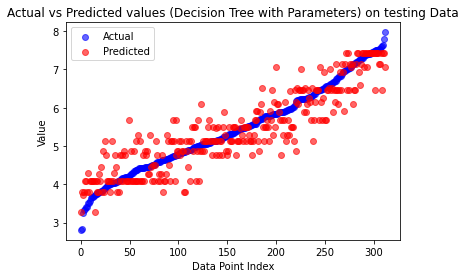

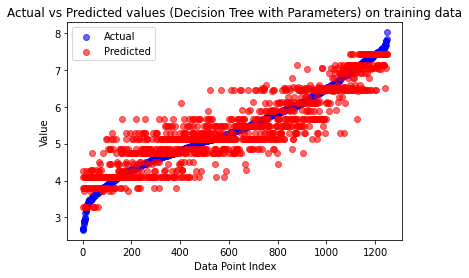

In [46]:
# Convert to NumPy arrays for consistent indexing (testing data)
y_test_array = np.array(y_test)
tree_model3_predictions_array = np.array(tree_model3_predictions)

# Sort the data for better visualization (testing data)
sorted_indices = np.argsort(y_test_array)
sorted_y_test = y_test_array[sorted_indices]
sorted_tree_model3_predictions = tree_model3_predictions_array[sorted_indices]

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), sorted_y_test, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), sorted_tree_model3_predictions, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values (Decision Tree with Parameters) on testing Data')
plt.legend()
plt.show()

# Convert to NumPy arrays for consistent indexing (training data)
y_train_array = np.array(y_train)
tree_model3_train_predictions_array = np.array(tree_model3_train_predictions)

# Sort the data for better visualization (training data)
sorted_indices = np.argsort(y_train_array)
sorted_y_train = y_train_array[sorted_indices]
sorted_tree_model3_train_predictions = tree_model3_train_predictions_array[sorted_indices]

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_train)), sorted_y_train, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_train)), sorted_tree_model3_train_predictions, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values (Decision Tree with Parameters) on training data')
plt.legend()
plt.show()


Similar results on training and testing data is a good sign

In [47]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

rf_train_predictions = rf_model.predict(X_train)

rf_predictions = rf_model.predict(X_test)

#validating on train
print('\nModel Performance training data\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_train, rf_train_predictions)))
print(' R^2 =   %.2f' % r2_score(y_train, rf_train_predictions))

#validating on test data
print('\nModel Performance testing data\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_test, rf_predictions)))
print(' R^2 =   %.2f' % r2_score(y_test, rf_predictions))



Model Performance training data

RMSE =   0.16
 R^2 =   0.98

Model Performance testing data

RMSE =   0.41
 R^2 =   0.87


RMSE is vert different - overfit; visualisation below to make sure


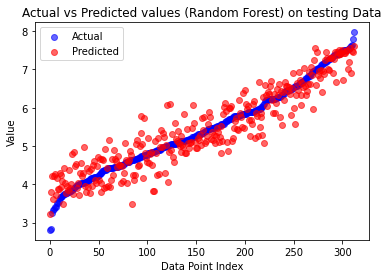

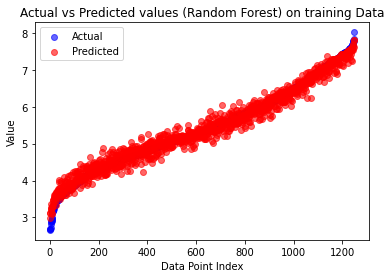

In [48]:
# Convert to NumPy arrays for consistent indexing (testing data)
y_test_array = np.array(y_test)
rf_predictions_array = np.array(rf_predictions)

# Sort the data for better visualization (testing data)
sorted_indices = np.argsort(y_test_array)
sorted_y_test = y_test_array[sorted_indices]
sorted_rf_predictions = rf_predictions_array[sorted_indices]

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), sorted_y_test, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), sorted_rf_predictions, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values (Random Forest) on testing Data')
plt.legend()
plt.show()

# Convert to NumPy arrays for consistent indexing (training data)
y_train_array = np.array(y_train)
rf_train_predictions_array = np.array(rf_train_predictions)

# Sort the data for better visualization (training data)
sorted_indices = np.argsort(y_train_array)
sorted_y_train = y_train_array[sorted_indices]
sorted_rf_train_predictions = rf_train_predictions_array[sorted_indices]

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_train)), sorted_y_train, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_train)), sorted_rf_train_predictions, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values (Random Forest) on training Data')
plt.legend()
plt.show()


# DO NOT RUN TAKES ABOUT 20 MINUTES
# FROM GRID SEARCH PARAMETRS HAVE BEEN USED IN RF_MODEL_GRID



rf_model2 = RandomForestRegressor(random_state=1234)


rf_params = {'n_estimators': [50, 100, 150, 200], 
          'max_depth': [None, 1,2,4,6,7,8,9, 10, 15, 20, 25, 30], 
          'min_samples_leaf': [1, 2, 4, 6 ,8], 
          'min_samples_split': [2,4, 5, 6, 10, 12]}


grid_search = GridSearchCV(rf_model2, rf_params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


print('Best parameters:', grid_search.best_params_)

print('Best score:', np.sqrt(-grid_search.best_score_))



Grid parametrs on first run with mean in missing values: {'n_estimators': [50, 100, 200], 'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}
Chosen grid paramtrs:

md 15, msl =1, mss =2, n_est = 200


Grid parametrs on second run with median in missing values: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

md=20, msl=1, mss=2, n_est=200
    
No difference in result when using first or second.

In [85]:
rf_modelGrid = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=1, min_samples_split=2,
                                     random_state=1234)

#max depth was changed from 15 to 5 which helped with overfitting


rf_modelGrid.fit(X_train, y_train)

rf_train_predictionsGrid = rf_modelGrid.predict(X_train)

rf_predictionsGrid = rf_modelGrid.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictionsGrid))
rf_r2 = r2_score(y_test, rf_predictionsGrid)

#validating on train
print('\nModel Performance training data\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_train, rf_train_predictionsGrid)))
print(' R^2 =   %.2f' % r2_score(y_train, rf_train_predictionsGrid))

#validating on test data
print('\nModel Performance testing data\n\nRMSE =   %.2f' % rf_rmse)
print(' R^2 =   %.2f' % rf_r2)


rf_grid_rmse_avg = (-1*cross_val_score(rf_modelGrid, X, y,scoring = 'neg_root_mean_squared_error', cv=3 )).mean()
print('\nModel Performance testing data\n\nRMSE average =   %.2f' % rf_grid_rmse_avg)


Model Performance training data

RMSE =   0.42
 R^2 =   0.86

Model Performance testing data

RMSE =   0.45
 R^2 =   0.84

Model Performance testing data

RMSE average =   0.55


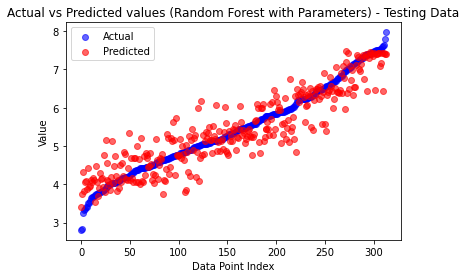

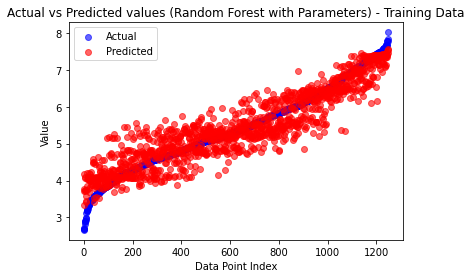

In [70]:
# Convert to NumPy arrays for consistent indexing (testing data)
y_test_array = np.array(y_test)
rf_predictionsGrid_array = np.array(rf_predictionsGrid)

# Sort the data for better visualization (testing data)
sorted_indices = np.argsort(y_test_array)
sorted_y_test = y_test_array[sorted_indices]
sorted_rf_predictionsGrid = rf_predictionsGrid_array[sorted_indices]

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), sorted_y_test, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), sorted_rf_predictionsGrid, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values (Random Forest with Parameters) - Testing Data')
plt.legend()
plt.show()

# Convert to NumPy arrays for consistent indexing (training data)
y_train_array = np.array(y_train)
rf_train_predictionsGrid_array = np.array(rf_train_predictionsGrid)

# Sort the data for better visualization (training data)
sorted_indices = np.argsort(y_train_array)
sorted_y_train = y_train_array[sorted_indices]
sorted_rf_train_predictionsGrid = rf_train_predictionsGrid_array[sorted_indices]

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_train)), sorted_y_train, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_train)), sorted_rf_train_predictionsGrid, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values (Random Forest with Parameters) - Training Data')
plt.legend()
plt.show()


Overfit!

In [51]:
#Stacking model

estimators = [("DT", DecisionTreeRegressor()),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor()),
              ("LR", LinearRegression())
             ]

stacking_model = StackingRegressor(estimators=estimators, cv=5, passthrough=False)

print('Performing Cross-Validation...')

rmse_avg = (-1*cross_val_score(stacking_model, X, y,scoring = 'neg_root_mean_squared_error', cv=3 )).mean()

print('End')
print('average score: {}'.format(rmse_avg))


Performing Cross-Validation...
End
average score: 0.5357100990487682


# DO NOT RUN TAKES 50 MINUTES. PARAMETRSFROM THIS GRID SEARCH WERE USED IN STACKING MODEL ABOVE


params = {
    "DT__max_depth": [2, 4, 6],          
    "GBDT__n_estimators": [ 50,100, 200],   
    "RF__n_estimators": [50, 100, 200],   
    "RF__max_depth": [5, 10, 15],
    "RF__min_samples_split": [2, 5, 10],
    "RF__min_samples_leaf": [1, 2, 4]
    
}

stack_grid = GridSearchCV(stacking_model, params, cv=3, verbose=4, scoring='neg_root_mean_squared_error', refit=True, n_jobs=-1)
stack_grid.fit(X_train, y_train)

stack_grid.cv_results_['mean_test_score']


print("best parameters:", stack_grid.best_params_)

rmse_stack_cv = -1*stack_grid.best_score_
print("[STACK] RMSE for the best model is : {:.2f}".format(rmse_stack_cv))

In [71]:
estimators_best = [("DT", DecisionTreeRegressor(max_depth=5, min_samples_leaf = 7,min_samples_split=6 )) ,
              ("RF", RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=1, min_samples_split=2,
                                     random_state=1234)),
              ("GBDT", GradientBoostingRegressor(n_estimators=100)),
              ("LR", LinearRegression())
             ]

#params for DT & RF were taken from previously created models

In [73]:
estimators_best_grid = [("DT", DecisionTreeRegressor(max_depth=6)) ,
              ("RF", RandomForestRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 )),
              ("GBDT", GradientBoostingRegressor(n_estimators=200)),
              ("LR", LinearRegression())
             ]
#taken from grid search; RF param was changed from 15 to 5 to prevent overfitting which helped

In [76]:
print('Implement Stacking...')



stacking_best_model = StackingRegressor(estimators = estimators_best_grid)
stacking_best_model.fit(X_train, y_train)

print('End')

stacking_best_pred = stacking_best_model.predict(X_test)

stacking_best_pred_train = stacking_best_model.predict(X_train)



#cross validation

cv_scores = cross_val_score(stacking_best_model, X, y, scoring='neg_mean_squared_error', cv=5)

# Convert to positive mean squared error
mse_scores = -cv_scores

# Print the MSE for each fold
print("Mean Squared Error for each fold:", mse_scores)

# Print the average MSE across all folds
print("Average Mean Squared Error:", np.mean(mse_scores))


#Compute the RMSE using mean_squared_error() for training and testing data
rmse_train = mean_squared_error(y_train, stacking_best_pred_train)

rmse = mean_squared_error(y_test, stacking_best_pred)

#Compute the R2 score using r2_score() for training and testing data

r2_train = r2_score(y_train, stacking_best_pred_train)
r2 = r2_score(y_test, stacking_best_pred)
           


print('\nRoot Mean Squared Error train: {0}'.format(rmse_train))
print('\nR2: {0}'.format(r2_train)) 


print('\nRoot Mean Squared Error test: {0}'.format(rmse))
print('\nR2: {0}'.format(r2)) 

Implement Stacking...
End
Mean Squared Error for each fold: [0.31350108 0.31368886 0.24640322 0.24988178 0.30846211]
Average Mean Squared Error: 0.2863874099277094

Root Mean Squared Error test: 0.18538693918765142

R2: 0.8572023815019543

Root Mean Squared Error train: 0.1261877610704623

R2: 0.8986618926391016


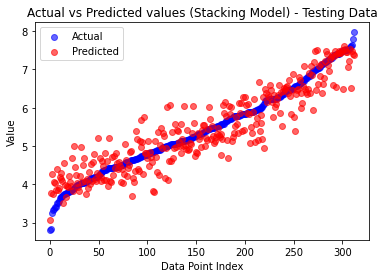

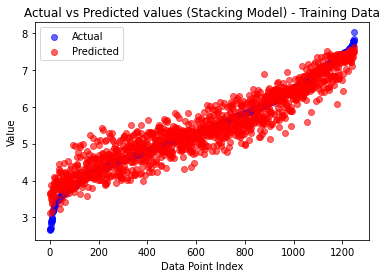

In [75]:

# Convert to NumPy arrays for consistent indexing (testing data)
y_test_array = np.array(y_test)
stacking_best_pred_array = np.array(stacking_best_pred)

# Sort the data for better visualization (testing data)
sorted_indices = np.argsort(y_test_array)
sorted_y_test = y_test_array[sorted_indices]
sorted_stacking_best_pred = stacking_best_pred_array[sorted_indices]

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), sorted_y_test, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), sorted_stacking_best_pred, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values (Stacking Model) - Testing Data')
plt.legend()
plt.show()

# Convert to NumPy arrays for consistent indexing (training data)
y_train_array = np.array(y_train)
stacking_best_pred_train_array = np.array(stacking_best_pred_train)

# Sort the data for better visualization (training data)
sorted_indices = np.argsort(y_train_array)
sorted_y_train = y_train_array[sorted_indices]
sorted_stacking_best_pred_train = stacking_best_pred_train_array[sorted_indices]

plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_train)), sorted_y_train, c='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_train)), sorted_stacking_best_pred_train, c='red', label='Predicted', alpha=0.6)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted values (Stacking Model) - Training Data')
plt.legend()
plt.show()


In [78]:
print('Begin GBDT Implementation...')

# 1. Create the  GradientBoostingRegressor model object below and assign to variable 'gbdt_model'
gbdt_model = GradientBoostingRegressor()
# 2. Fit the model to the training data below
gbdt_model.fit(X_train, y_train)

# 3. Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_gbdt_pred'
y_gbdt_pred = gbdt_model.predict(X_test)

y_gbdt_pred_train = gbdt_model.predict(X_train)

# 4. Compute the RMSE and R2 (on y_test and y_gbdt_pred) and save the results to gbdt_rmse and gbdt_r2
# YOUR CODE HERE

gbdt_rmse_train = mean_squared_error(y_train, y_gbdt_pred_train)


gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred)



gbdt_r2 = r2_score(y_test, y_gbdt_pred)

gbdt_r2_train = r2_score(y_train, y_gbdt_pred_train)

print('End')

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 


print('[GBDT] Root Mean Squared Error on training data: {0}'.format(gbdt_rmse_train))
print('[GBDT] R2 on training data: {0}'.format(gbdt_r2_train))  



Begin GBDT Implementation...
End
[GBDT] Root Mean Squared Error: 0.19329822142534642
[GBDT] R2: 0.8511085743127369
[GBDT] Root Mean Squared Error on training data: 0.132873087590177
[GBDT] R2 on training data: 0.8932930808712217


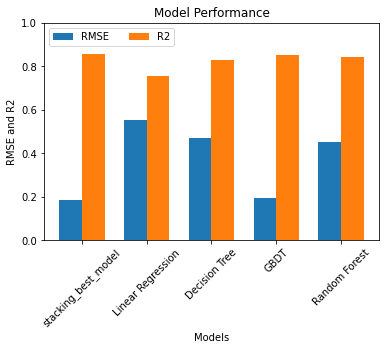

In [86]:
RMSE_Results = [rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [r2, lr_r2, dt_r2, gbdt_r2, rf_r2]

rg= np.arange(5)
width = 0.35

# 1. Create bar plot with RMSE results
plt.bar(rg - width/2, RMSE_Results, width, label='RMSE')
# 2. Create bar plot with R2 results
plt.bar(rg + width/2, R2_Results, width, label='R2')

# 3. Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
models = ['stacking_best_model', 'Linear Regression', 'Decision Tree', 'GBDT', 'Random Forest']

plt.xticks(rg, models, rotation=45)
# 4. Label the x and y axis of the plot: the x axis should be labeled "Models" and the y axis
# should be labeled "RMSE and R2"
plt.xlabel('Models')
plt.ylabel('RMSE and R2')

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

Stacking model perfoms better than other models with RMSE 0.18 and R^2 of 85. 